In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [ ]:
trades = pd.read_csv("../data/historical_data.csv")
sentiment = pd.read_csv("../data/fear_greed_index.csv")

trades.head(), sentiment.head()


(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash     Order ID  \
 0      

In [7]:
import pandas as pd

df = pd.read_csv("../data/historical_data.csv")   
df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [9]:
import pandas as pd
total_volume_usd = df["Size USD"].sum()
total_volume_usd


np.float64(1191187442.46)

In [10]:
import pandas as pd 
total_tokens_bought = df[df["Side"] == "BUY"]["Size Tokens"].sum()
total_tokens_sold = df[df["Side"] == "SELL"]["Size Tokens"].sum()

total_tokens_bought, total_tokens_sold


(np.float64(488646348.85822004), np.float64(487919295.42007315))

In [11]:
import pandas as pd
buy_df = df[df["Side"] == "BUY"]

weighted_avg_buy_price = (
    (buy_df["Execution Price"] * buy_df["Size Tokens"]).sum()
    / buy_df["Size Tokens"].sum()
)

weighted_avg_buy_price


np.float64(1.2121631153559291)

In [12]:
import pandas as pd
total_fees = df["Fee"].sum()
total_fees


np.float64(245857.72056573082)

In [13]:
import pandas as pd
buy_count = df[df["Side"] == "BUY"].shape[0]
sell_count = df[df["Side"] == "SELL"].shape[0]

buy_count, sell_count


(102696, 108528)

In [17]:
# ==============================
# 1. IMPORT LIBRARIES
# ==============================
import pandas as pd
import numpy as np

# ==============================
# 2. LOAD DATA
# ==============================
# Change path if needed
df = pd.read_csv("../data/historical_data.csv")

# ==============================
# 3. DATA CLEANING
# ==============================
# Convert execution price to numeric (remove @ if present)
df["Execution Price"] = (
    df["Execution Price"]
    .astype(str)
    .str.replace("@", "", regex=False)
    .astype(float)
)

# Convert timestamp (DD-MM-YYYY format)
df["Timestamp IST"] = pd.to_datetime(
    df["Timestamp IST"],
    dayfirst=True,
    errors="coerce"
)

# ==============================
# 4. CORE METRICS CALCULATION
# ==============================

# Total Volume Traded (USD)
total_volume_usd = df["Size USD"].sum()

# Total Tokens Bought & Sold
total_tokens_bought = df[df["Side"] == "BUY"]["Size Tokens"].sum()
total_tokens_sold = df[df["Side"] == "SELL"]["Size Tokens"].sum()

# Weighted Average Buy Price
buy_df = df[df["Side"] == "BUY"]
weighted_avg_buy_price = (
    (buy_df["Execution Price"] * buy_df["Size Tokens"]).sum()
    / buy_df["Size Tokens"].sum()
)

# Total Fees Paid
total_fees = df["Fee"].sum()

# Buy vs Sell Trade Count
buy_trades = df[df["Side"] == "BUY"].shape[0]
sell_trades = df[df["Side"] == "SELL"].shape[0]

# Holding vs Frequent Trading (Time gap)
time_diff_seconds = df["Timestamp IST"].diff().dt.total_seconds()
avg_time_between_trades = time_diff_seconds.mean()

# ==============================
# 5. PRINT FINAL RESULTS
# ==============================
print("====== BASIC TRADER METRICS ======")
print(f"Total Volume Traded (USD): {total_volume_usd:.2f}")
print(f"Total Tokens Bought: {total_tokens_bought:.2f}")
print(f"Total Tokens Sold: {total_tokens_sold:.2f}")
print(f"Weighted Average Buy Price: {weighted_avg_buy_price:.4f}")
print(f"Total Fees Paid: {total_fees:.4f}")
print(f"Number of Buy Trades: {buy_trades}")
print(f"Number of Sell Trades: {sell_trades}")
print(f"Average Time Between Trades (seconds): {avg_time_between_trades:.2f}")


====== BASIC TRADER METRICS ======
Total Volume Traded (USD): 1191187442.46
Total Tokens Bought: 488646348.86
Total Tokens Sold: 487919295.42
Weighted Average Buy Price: 1.2122
Total Fees Paid: 245857.7206
Number of Buy Trades: 102696
Number of Sell Trades: 108528
Average Time Between Trades (seconds): 58.78


In [22]:
sentiment_df = pd.read_csv("../data/fear_greed_index.csv")
sentiment_df.head()
# Convert sentiment date
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"]).dt.date

# Extract date from trader timestamps
df["Trade Date"] = df["Timestamp IST"].dt.date
merged_df = df.merge(
    sentiment_df[["date", "classification"]],
    left_on="Trade Date",
    right_on="date",
    how="left"
)
merged_df["classification"].value_counts()




classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

In [23]:
volume_by_sentiment = (
    merged_df.groupby("classification")["Size USD"].sum()
)
volume_by_sentiment
avg_pnl_by_sentiment = (
    merged_df.groupby("classification")["Closed PnL"].mean()
)
avg_pnl_by_sentiment
trades_by_sentiment = (
    merged_df["classification"].value_counts()
)
trades_by_sentiment
side_sentiment = (
    merged_df.groupby(["classification", "Side"])
    .size()
    .unstack(fill_value=0)
)
side_sentiment


Side,BUY,SELL
classification,,
Extreme Fear,10935,10465
Extreme Greed,17940,22052
Fear,30270,31567
Greed,24576,25727
Neutral,18969,18717


In [25]:
# Total PnL
total_pnl = merged_df["Closed PnL"].sum()

# Average PnL per trade
avg_pnl_per_trade = merged_df["Closed PnL"].mean()

# Median PnL (robust metric)
median_pnl = merged_df["Closed PnL"].median()

total_pnl, avg_pnl_per_trade, median_pnl
winning_trades = merged_df[merged_df["Closed PnL"] > 0].shape[0]
losing_trades = merged_df[merged_df["Closed PnL"] < 0].shape[0]
breakeven_trades = merged_df[merged_df["Closed PnL"] == 0].shape[0]

total_trades = merged_df.shape[0]

win_rate = (winning_trades / total_trades) * 100

winning_trades, losing_trades, breakeven_trades, win_rate
pnl_by_sentiment = (
    merged_df.groupby("classification")["Closed PnL"].mean()
)
pnl_by_sentiment
win_rate_by_sentiment = (
    merged_df.assign(
        win=merged_df["Closed PnL"] > 0
    )
    .groupby("classification")["win"]
    .mean() * 100
)

win_rate_by_sentiment


classification
Extreme Fear     37.060748
Extreme Greed    46.494299
Fear             42.076750
Greed            38.482794
Neutral          39.699093
Name: win, dtype: float64

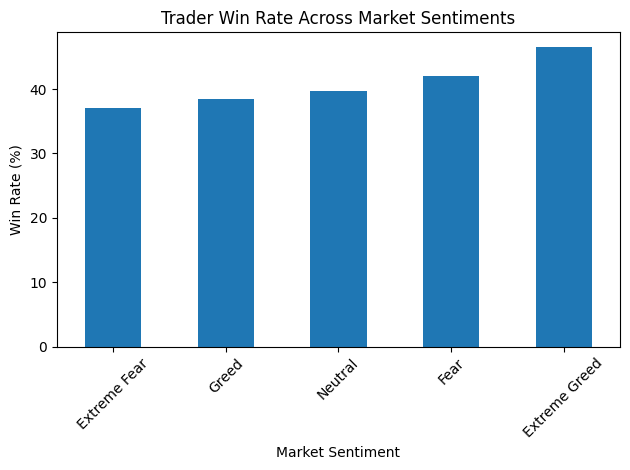

In [26]:
import matplotlib.pyplot as plt

# Win rate by sentiment (already calculated)
win_rate_by_sentiment = (
    merged_df.assign(win=merged_df["Closed PnL"] > 0)
    .groupby("classification")["win"]
    .mean() * 100
)

# Sort for better visualization
win_rate_by_sentiment = win_rate_by_sentiment.sort_values()

# Plot
plt.figure()
win_rate_by_sentiment.plot(kind="bar")
plt.xlabel("Market Sentiment")
plt.ylabel("Win Rate (%)")
plt.title("Trader Win Rate Across Market Sentiments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


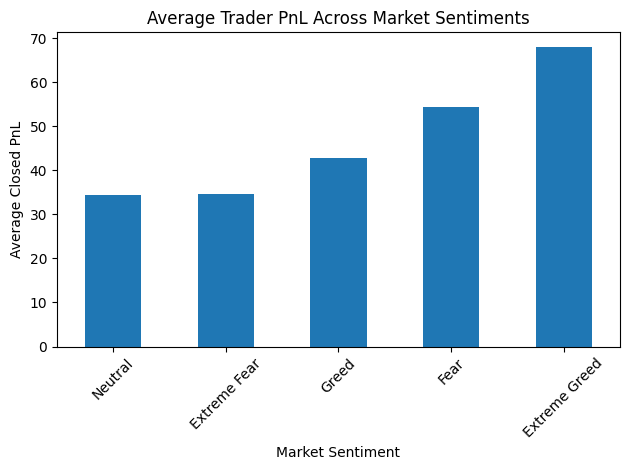

In [27]:
import matplotlib.pyplot as plt

# Average PnL by sentiment
avg_pnl_by_sentiment = (
    merged_df.groupby("classification")["Closed PnL"].mean()
).sort_values()

plt.figure()
avg_pnl_by_sentiment.plot(kind="bar")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.title("Average Trader PnL Across Market Sentiments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


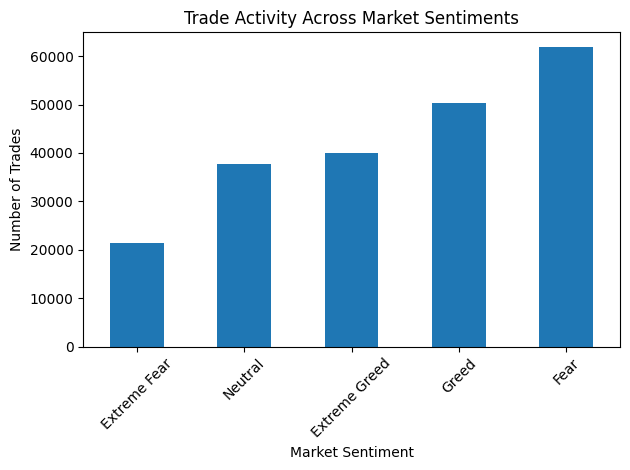

In [28]:
import matplotlib.pyplot as plt

trade_count_by_sentiment = (
    merged_df["classification"]
    .value_counts()
    .sort_values()
)

plt.figure()
trade_count_by_sentiment.plot(kind="bar")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.title("Trade Activity Across Market Sentiments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
